# Mô hình hóa dữ liệu BigDS

### Mô hình hóa dữ liệu với 2 mô hình linear regression và random forest regression, đánh giá độ quan trọng của các bước xử lý trích xuất dữ liệu, cuối cùng điều chỉnh mô hình bằng việc điều chỉnh các siêu tham số

### 1. Đọc thư viện

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer

In [14]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### 2. Khởi tạo các dataframe và biến thích hợp hỗ trợ chạy mô hình và lưu kết quả

In [15]:
data = {'name': ['bigDS_fillnull.csv', 'bigDS_outlier.csv', 'bigDS_normalizer.csv', 'bigDS_FTselection.csv'],
        'stage': ['Fill null', 'Outlier handling', 'Scaling normalizer', 'Feature Selection']
}
data_names = pd.DataFrame(data)
data = {'name': ['Linear regression', 'Random Forest Regression'],
          'model': [LinearRegression(), RandomForestRegressor(random_state=42)]   
}
models = pd.DataFrame(data)
result_MAE = []
result_RMSE = []
result_R2 = []

### 3. Fit dữ liệu vào mô hình và đánh giá độ quan trọng các bước xử lý trích xuất dữ liệu

In [16]:
for model_index,model_row in models.iterrows():
    model = model_row['model']
    print(model_row['name'],':')
    for index,row in data_names.iterrows():
        df = pd.read_csv(row['name'])
        if row['name']!='bigDS_FTselection.csv':
            X = df.drop(['price','type'],axis=1)
        else:
            X = df.drop('price',axis=1)
        y = df['price']
        # Chia tập dữ liệu ban đầu thành tập train và tập còn lại
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

        # Áp dụng vào mô hình Linear Regression
        model.fit(X_train, y_train)

        # Đánh giá mô hình trên tập test
        y_pred = model.predict(X_test)

        # Đánh giá mô hình
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        
        result_MAE.append(mae)
        result_RMSE.append(rmse)
        result_R2.append(r2)

        print(row['stage'], ':')
        print(f"MAE: {mae}")
        print(f"RMSE: {rmse}")
        print(f"R-squared: {r2}")
        print('\n')


Linear regression :
Fill null :
MAE: 2444848.40099248
RMSE: 3326356.789479278
R-squared: 0.6525270044317997


Outlier handling :
MAE: 2428231.004813155
RMSE: 3318906.701552667
R-squared: 0.65408174167379


Scaling normalizer :
MAE: 2488222.378705787
RMSE: 3381312.7743223445
R-squared: 0.640950696976724


Feature Selection :
MAE: 2977355.700189527
RMSE: 3993625.9220750546
R-squared: 0.49913790839266803


Random Forest Regression :
Fill null :
MAE: 1352806.3293223057
RMSE: 2413877.971597018
R-squared: 0.8170156192913305


Outlier handling :
MAE: 1355075.5468839016
RMSE: 2419494.8463536305
R-squared: 0.8161630524590495


Scaling normalizer :
MAE: 1347485.8191810192
RMSE: 2377989.52640211
R-squared: 0.8224162296105847


Feature Selection :
MAE: 1380373.098707207
RMSE: 2426831.742995432
R-squared: 0.8150464245561138




Linear Regression
Best metrics value: MAE: 2428231.004813155 RMSE: 3318906.701552667 R2: 0.65408174167379


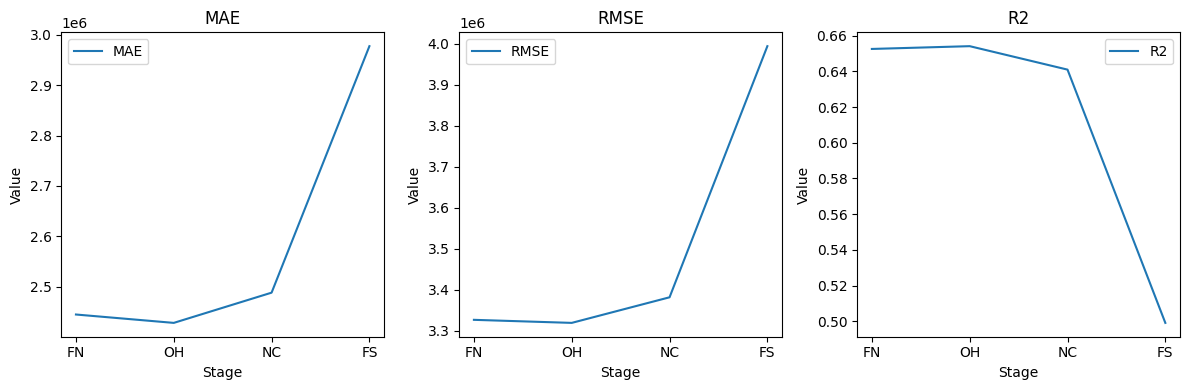

In [17]:
print("Linear Regression")
best_metrics_lr = [min(result_MAE[:4]),min(result_RMSE[:4]),max(result_R2[:4])]
print('Best metrics value: MAE:', best_metrics_lr[0], 'RMSE:', best_metrics_lr[1], 'R2:', best_metrics_lr[2])
# Tạo figure và axes
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Đồ thị đầu tiên
axes[0].plot(result_MAE[:4], label="MAE")
axes[0].set_xticks(range(4))
axes[0].set_xticklabels(["FN", "OH", "NC", "FS"])
axes[0].set_xlabel("Stage")
axes[0].set_ylabel("Value")
axes[0].set_title("MAE")
axes[0].legend()

# Đồ thị thứ hai
axes[1].plot(result_RMSE[:4], label="RMSE")
axes[1].set_xticks(range(4))
axes[1].set_xticklabels(["FN", "OH", "NC", "FS"])
axes[1].set_xlabel("Stage")
axes[1].set_ylabel("Value")
axes[1].set_title("RMSE")
axes[1].legend()

# Đồ thị thứ ba
axes[2].plot(result_R2[:4], label="R2")
axes[2].set_xticks(range(4))
axes[2].set_xticklabels(["FN", "OH", "NC", "FS"])
axes[2].set_xlabel("Stage")
axes[2].set_ylabel("Value")
axes[2].set_title("R2")
axes[2].legend()

# Căn chỉnh và hiển thị figure
plt.tight_layout()
plt.show()

##### Nhận xét độ quan trọng của các quá trình xử lý dữ liệu trên mô hình hóa Linear Regression ở BigDS:
##### - Mô hình được cải thiện qua các bước: Outlier Handling
##### - Mô hình trở nên kém đi qua các bước: Normalizer Scaling, Feature Selection
##### -> Các kĩ thuật cải thiện hiệu quả của thuật toán là: Outlier Handling

Random Forest Regression
Best metrics value: MAE: 1347485.8191810192 RMSE: 2377989.52640211 R2: 0.8224162296105847


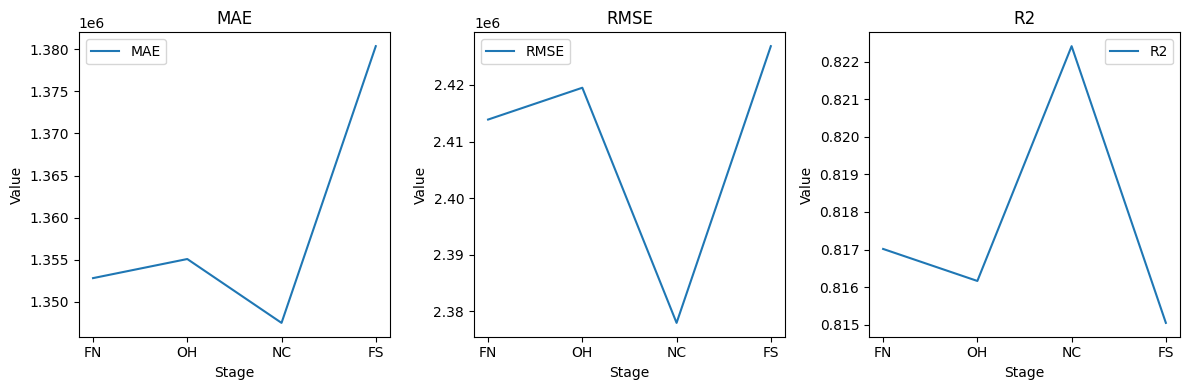

In [18]:
print("Random Forest Regression")
best_metrics_rfr = [min(result_MAE[4:8]),min(result_RMSE[4:8]),max(result_R2[4:8])]
print('Best metrics value: MAE:', best_metrics_rfr[0], 'RMSE:', best_metrics_rfr[1], 'R2:', best_metrics_rfr[2])
# Tạo figure và axes
fig2, axes = plt.subplots(1, 3, figsize=(12, 4))

# Đồ thị đầu tiên
axes[0].plot(result_MAE[4:8], label="MAE")
axes[0].set_xticks(range(4))
axes[0].set_xticklabels(["FN", "OH", "NC", "FS"])
axes[0].set_xlabel("Stage")
axes[0].set_ylabel("Value")
axes[0].set_title("MAE")
axes[0].legend()

# Đồ thị thứ hai
axes[1].plot(result_RMSE[4:8], label="RMSE")
axes[1].set_xticks(range(4))
axes[1].set_xticklabels(["FN", "OH", "NC", "FS"])
axes[1].set_xlabel("Stage")
axes[1].set_ylabel("Value")
axes[1].set_title("RMSE")
axes[1].legend()

# Đồ thị thứ ba
axes[2].plot(result_R2[4:8], label="R2")
axes[2].set_xticks(range(4))
axes[2].set_xticklabels(["FN", "OH", "NC", "FS"])
axes[2].set_xlabel("Stage")
axes[2].set_ylabel("Value")
axes[2].set_title("R2")
axes[2].legend()


# Căn chỉnh và hiển thị figure
plt.tight_layout()
plt.show()

##### Nhận xét độ quan trọng của các quá trình xử lý dữ liệu trên mô hình hóa Random Forest Regression ở BigDS:
##### - Mô hình được cải thiện qua các bước: Normalizer Scaling
##### - Mô hình trở nên kém đi qua các bước: Outlier Handling, Feature Selection
##### -> Các kĩ thuật cải thiện hiệu quả của thuật toán là: Normalizer Scaling

### 4. Thiết lập các siêu tham số tham gia vào việc điều chỉnh tham số(Vì Linear Regression không có siêu tham số nên chỉ khảo sát trên thuật toán Random Forest Regression)

In [19]:
param_grid = {'bootstrap': [True, False],
              'max_depth': [None, 5, 10],
              'max_features': ['auto','sqrt'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [100, 200, 300]}
scorer = make_scorer(r2_score)
df = pd.read_csv('bigDS_normalizer.csv')
X = df.drop(['price','type'], axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### 5. Điều chỉnh siêu tham số bằng grid search và đưa ra kết quả của mô hình chứa tham số tối ưu nhất

In [20]:
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring=scorer)

In [21]:
grid_search.fit(X_train, y_train)
print("Best Score:", grid_search.best_score_)
print("Best Parameters:", grid_search.best_params_)

Best Score: 0.7205369967089365
Best Parameters: {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


### Kiểm thử mô hình tối ưu trên tập test

In [25]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Đánh giá mô hình
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print("Hyperparameter tuning - Random Forest Regression:")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R-squared: {r2}")

Hyperparameter tuning - Random Forest Regression:
MAE: 1341324.1543589572
RMSE: 2269913.6731243203
R-squared: 0.8381912215193819


### So sánh kết quả trước và sau khi điều chỉnh tham số

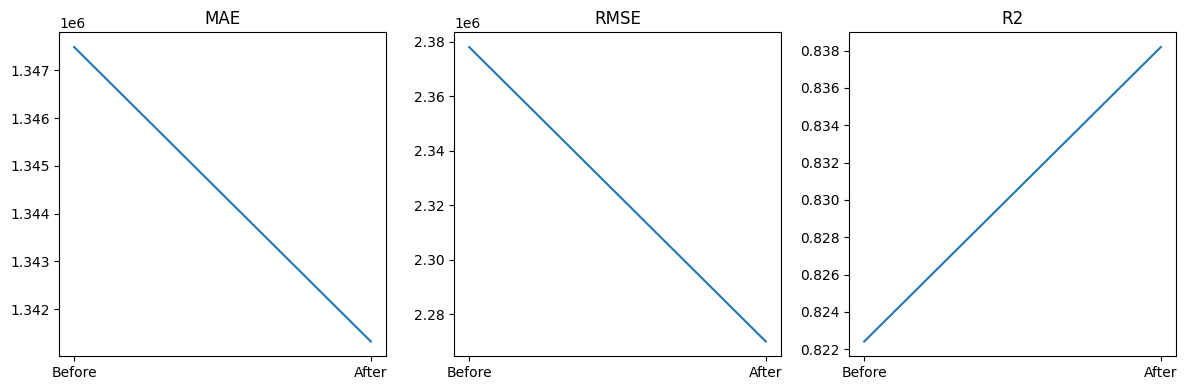

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
index = [0, 1]

# Vẽ đồ thị cột thứ nhất: so sánh value đầu tiên với MAE
axes[0].plot(index, [best_metrics_rfr[0], mae])
axes[0].set_xticks(range(2))
axes[0].set_xticklabels(["Before", "After"])
axes[0].set_title('MAE')

# Vẽ đồ thị cột thứ hai: so sánh value thứ hai với RMSE
axes[1].plot(index, [best_metrics_rfr[1], rmse])
axes[1].set_xticks(range(2))
axes[1].set_xticklabels(["Before", "After"])
axes[1].set_title('RMSE')

# Vẽ đồ thị cột thứ ba: so sánh value thứ ba với R2
axes[2].plot(index, [best_metrics_rfr[2], r2])
axes[2].set_xticks(range(2))
axes[2].set_xticklabels(["Before", "After"])
axes[2].set_title('R2')

# Hiển thị đồ thị
plt.tight_layout()
plt.show()


#### Nhận xét: Việc điều chỉnh siêu tham số góp phần cải thiện độ hiệu quả của mô hình

### 6. So sánh kết quả tốt nhất của 2 mô hình

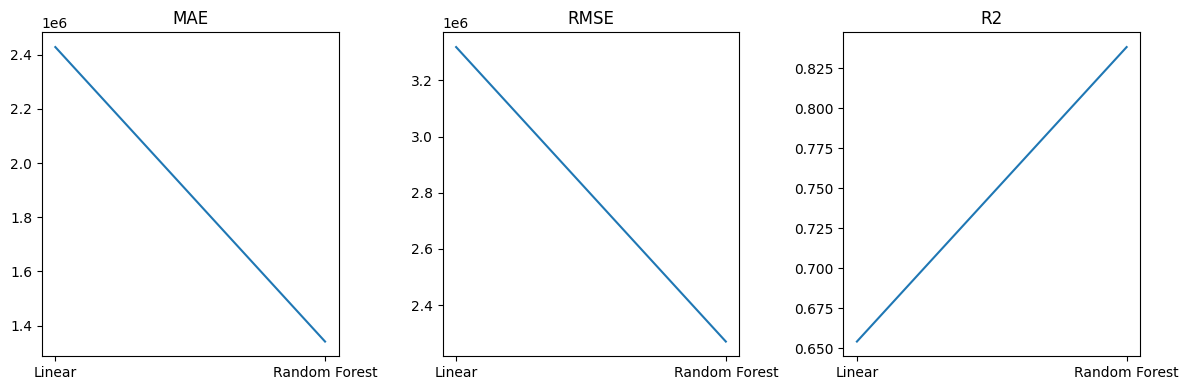

Best metrics value - Linear Regression: MAE: 2428231.004813155 RMSE: 3318906.701552667 R2: 0.65408174167379
Best metrics value - Random Forest Regression: MAE: 1341324.1543589572 RMSE: 2269913.6731243203 R2: 0.8381912215193819


In [27]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
index = [0, 1]

axes[0].plot(index, [best_metrics_lr[0], mae])
axes[0].set_xticks(range(2))
axes[0].set_xticklabels(["Linear", "Random Forest"])
axes[0].set_title('MAE')

axes[1].plot(index, [best_metrics_lr[1], rmse])
axes[1].set_xticks(range(2))
axes[1].set_xticklabels(["Linear", "Random Forest"])
axes[1].set_title('RMSE')

axes[2].plot(index, [best_metrics_lr[2], r2])
axes[2].set_xticks(range(2))
axes[2].set_xticklabels(["Linear", "Random Forest"])
axes[2].set_title('R2')

plt.tight_layout()
plt.show()

print('Best metrics value - Linear Regression: MAE:', best_metrics_lr[0], 'RMSE:', best_metrics_lr[1], 'R2:', best_metrics_lr[2])
print('Best metrics value - Random Forest Regression: MAE:', mae, 'RMSE:', rmse, 'R2:', r2)


### Kết luận trên dữ liệu BigDS:
### - Mô hình hóa dữ liệu dựa trên thuật toán Random Forest Regression tỏ ra hiệu quả hơn hẳn so với mô hìn hóa dữ liệu dựa trên thuật toán Linear Regression
### - Các kĩ thuật gia tăng độ hiệu quả cho Linear Regression là: Outlier Handling 
### - Các kĩ thuật gia tăng độ hiệu quả cho Random Forest là: Normalizer Scaling và Hyperparameter Tuning